### DATA ANALYSIS

This notebook provides a basic visual analysis of the three datasets created.

1. **Maximum Average and Minimum Average** - Analysis of the time series for the articles that have the highest average page requests and the lowest average page requests for desktop access and mobile access. 
2. **Top 10 Peak Page Views** - Analysis of the time series for the top 10 article pages by largest (peak) page views over the entire time by access type. 
3. **Fewest Months of Data** - Analysis of the time series to show pages that have the fewest months of available data.

In [1]:
# Importing libraries
import json
import matplotlib.pyplot as plt
import matplotlib.dates as dt
from datetime import datetime

In [2]:
# Reading JSON files
desktop_data = json.load(open("../data/dino_monthly_desktop_201501-202209.json"))
mobile_data = json.load(open("../data/dino_monthly_mobile_201501-202209.json")) 

#### Maximum Average and Minimum Average

The first graph should contain time series for the articles that have the highest average page requests and the lowest average page requests for desktop access and mobile access. Your graph should have four lines (max desktop, min desktop, max mobile, min mobile).

In [3]:
# Returns the maximum and minimum average pageviews by access type.
def find_avg_views(data):
    avg_views = {}
    for title,items in data.items():
        sum_views = 0
        for month in items:
            sum_views += month['views']
        avg_views[title] = sum_views/(len(items))
    views = list(avg_views.values())
    titles = list(avg_views.keys())
    max_title = titles[views.index(max(views))]
    print(max_title)
    min_title = titles[views.index(min(views))]
    print(min_title)
    return (max_title, min_title)

In [4]:
desktop_max, desktop_min = find_avg_views(desktop_data)
mobile_max, mobile_min = find_avg_views(mobile_data)
# the maximum and minimum averages are stored in a dictionary for visualization
avg_values = {'desktop_max_'+desktop_max: desktop_data[desktop_max], 'desktop_min_'+desktop_min: desktop_data[desktop_min],
                'mobile_max_'+mobile_max: mobile_data[mobile_max], 'mobile_min_'+mobile_min: mobile_data[mobile_min]}

Tyrannosaurus
Honghesaurus
Tyrannosaurus
Honghesaurus


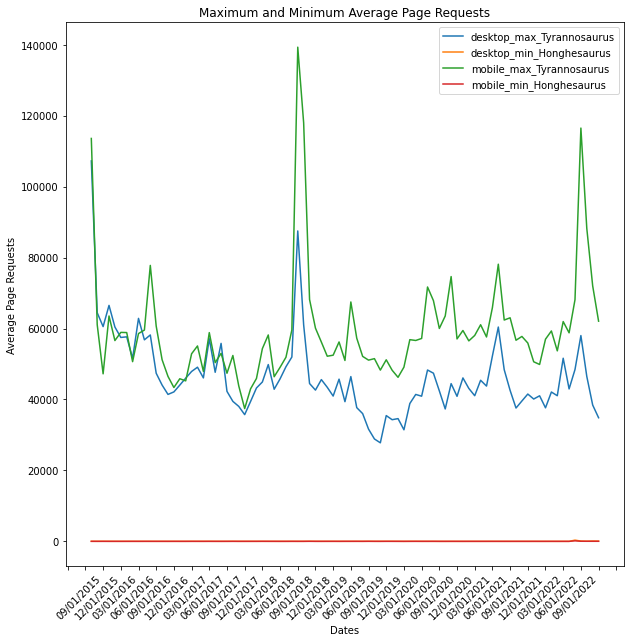

In [5]:
# Visualizing the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)  
for title, items in avg_values.items():
    dates_full = [month["timestamp"] for month in items]
    dates = [datetime.strptime(date, '%Y%m%d00').strftime('%m/%d/%Y') for date in dates_full]
    views = [month["views"] for month in items]
    plt.plot(dates, views, label=title)
ax.xaxis.set_major_locator(dt.DayLocator(interval=3))
plt.title("Maximum and Minimum Average Page Requests")
plt.xlabel("Dates")
plt.ylabel("Average Page Requests")
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.savefig("maximum_minimum_average.png", facecolor='white')
plt.show()

#### Top 10 Peak Page Views

The second graph should contain time series for the top 10 article pages by largest (peak) page views over the entire time by access type. You first find the month for each article that contains the highest (peak) page views, and then order the articles by these peak values. Your graph should contain the top 10 for desktop and top 10 for mobile access (20 lines)

In [6]:
# Returns the top 10 peak pageviews by access type.
def find_peak_views(data):
    peak_views = {}
    for title,items in data.items():
        top_page_view = 0
        for month in items:
            top_page_view = max(top_page_view, int(month['views']))
        peak_views[title] = top_page_view
    sorted_views = sorted(peak_views, key=peak_views.get, reverse= True)[:10]
    print(sorted_views)
    return sorted_views

In [7]:
desktop_peak = find_peak_views(desktop_data)
mobile_peak = find_peak_views(mobile_data)
# the peak page views are stored in a dictionary for visualization
peak_values = {}
for title in desktop_peak:
    peak_values["desktop_"+title] = desktop_data[title]
for title in mobile_peak:
    peak_values["mobile_"+title] = mobile_data[title]

['Achelousaurus', 'Velociraptor', 'Tyrannosaurus', 'Halszkaraptor', 'Giganotosaurus', 'Spinosaurus', 'Lythronax', 'Nigersaurus', 'Borealopelta', 'Dilophosaurus']
['Nigersaurus', 'Deinocheirus', 'Giganotosaurus', 'Therizinosaurus', 'Velociraptor', 'Achelousaurus', 'Tyrannosaurus', 'Borealopelta', 'Dilophosaurus', 'Argentinosaurus']


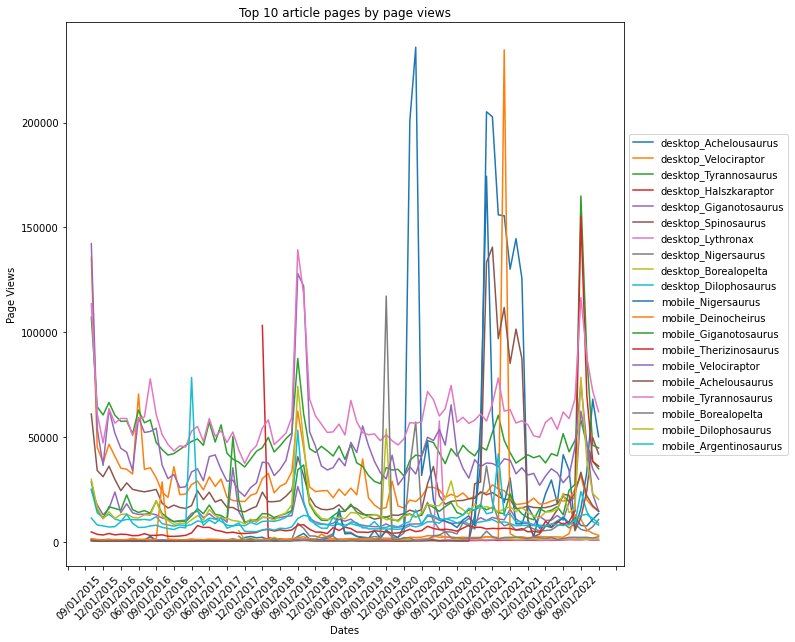

In [8]:
# Visualizing the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)  
for title, items in peak_values.items():
    dates_full = [month["timestamp"] for month in items]
    dates = [datetime.strptime(date, '%Y%m%d00').strftime('%m/%d/%Y') for date in dates_full]
    views = [month["views"] for month in items]
    plt.plot(dates, views, label=title)
ax.xaxis.set_major_locator(dt.DayLocator(interval=3))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Top 10 article pages by page views")
plt.xlabel("Dates")
plt.ylabel("Page Views")
#plt.legend()
plt.xticks(rotation=45, ha='right')
plt.savefig("top_ten_peaks.png", bbox_inches="tight", facecolor='white')
plt.show()

#### Fewest Months of Data

The third graph should show pages that have the fewest months of available data. These will all be relatively short time series, some may only have one month of data. Your graph should show the 10 articles with the fewest months of data for desktop access and the 10 articles with the fewest months of data for mobile access.

In [33]:
# Returns the fewest months of available data by access type.
def find_least_data(data):
    month_len = {}
    for title,item in data.items():
        month_len[title] = len(item)
    sorted_month_len = sorted(month_len, key=month_len.get)[:10]
    print(sorted_month_len)
    return list(reversed(sorted_month_len))

In [34]:
desktop_months = find_least_data(desktop_data)
mobile_months = find_least_data(mobile_data)
# the fewest months of data are stored in a dictionary for visualization
month_values = {}
for title in desktop_months:
    month_values["desktop_"+title] = desktop_data[title]
for title in mobile_months:
    month_values["mobile_"+title] = mobile_data[title]

['Elemgasem', 'Tuebingosaurus', 'Bisticeratops', 'Jakapil', 'Mbiresaurus', 'Perijasaurus', 'Iyuku', 'Paralitherizinosaurus', 'Bashanosaurus', 'Dzharaonyx']
['Elemgasem', 'Tuebingosaurus', 'Bisticeratops', 'Jakapil', 'Mbiresaurus', 'Perijasaurus', 'Iyuku', 'Paralitherizinosaurus', 'Bashanosaurus', 'Dzharaonyx']


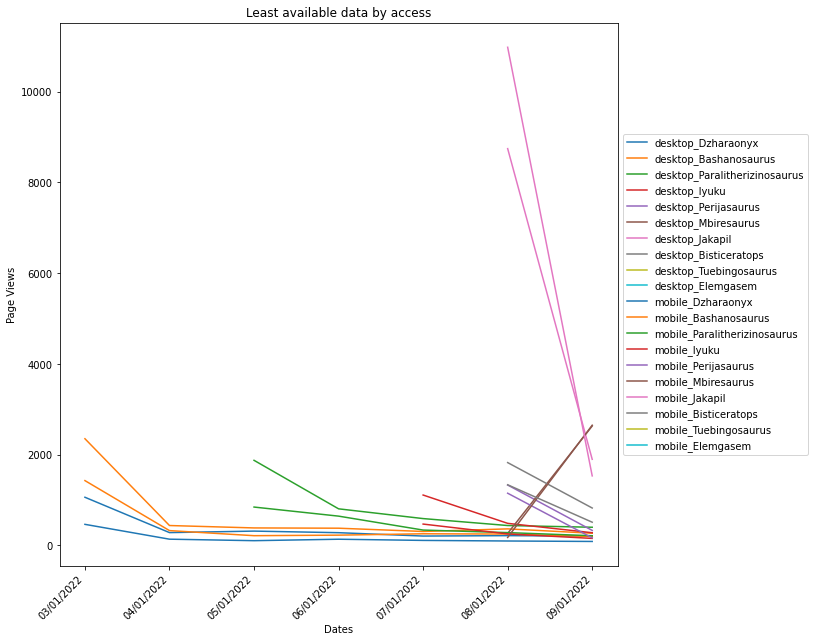

In [30]:
# Visualizing the results
from datetime import datetime

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)  
for title, items in month_values.items():
    dates_full = [month["timestamp"] for month in items]
    dates = [datetime.strptime(date, '%Y%m%d00').strftime('%m/%d/%Y') for date in dates_full]
    views = [month["views"] for month in items]
    plt.plot(dates, views, label=title)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Least available data by access")
plt.xlabel("Dates")
plt.ylabel("Page Views")
#plt.legend()
plt.xticks(rotation=45, ha='right')
plt.savefig("fewest_months.png", bbox_inches="tight", facecolor='white')
plt.show()